# MNIST Fashion Recognizer with CNN

## Libraries

In [35]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense , Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

## Data Loading and Visualization

In [3]:
train=pd.read_csv('Fashion MNIST/fashion-mnist_train.csv')

In [6]:
print(train.shape)
train.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test=pd.read_csv('Fashion MNIST/fashion-mnist_test.csv')

In [9]:
print(test.shape)
test.head()

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

### Train

In [10]:
# Separating feature vectors and the label
X_train=train.drop('label',1)
y_train=train['label']

# Converting to numpy ndarray
X_train=X_train.to_numpy()

# Reshaping from 3D tensor to 4D tensor
X_train=X_train.reshape(60000,28,28,1)

### Test

In [13]:
# Separating feature vectors and the label
X_test=test.drop('label',1)
y_test=test['label']

# Converting to numpy ndarray
X_test=X_test.to_numpy()
X_test=X_test.reshape(10000,28,28,1)

# Reshaping from 3D tensor to 4D tensor
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

**Confirming Image with their labels**

'Pullover'

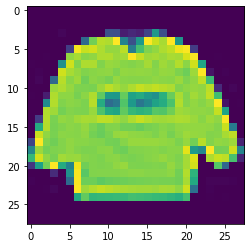

In [16]:
labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.imshow(X_train[0].reshape(28,28))
labels[y_train[0]]

In [17]:
# Normalizing data
X_train=X_train/255.0
X_test=X_test/255.0

## Model building

Building a CNN model for image classification using **2D ConvNet** from keras

In [18]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))    # reduce overfitting

model.add(Flatten())    # converting to 1-D array
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))   # Output layer for 10-class classification

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
hist=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test,y_test),verbose=1)   
# testing data is set as validation data

Epoch 1/10
469/469 [==============================] - 70s 149ms/step - loss: 0.5161 - accuracy: 0.8177 - val_loss: 0.3256 - val_accuracy: 0.8829
Epoch 2/10
469/469 [==============================] - 73s 156ms/step - loss: 0.3437 - accuracy: 0.8777 - val_loss: 0.2641 - val_accuracy: 0.9082
Epoch 3/10
469/469 [==============================] - 78s 166ms/step - loss: 0.2912 - accuracy: 0.8954 - val_loss: 0.2354 - val_accuracy: 0.9125
Epoch 4/10
469/469 [==============================] - 78s 166ms/step - loss: 0.2613 - accuracy: 0.9079 - val_loss: 0.2163 - val_accuracy: 0.9212
Epoch 5/10
469/469 [==============================] - 76s 163ms/step - loss: 0.2386 - accuracy: 0.9131 - val_loss: 0.2121 - val_accuracy: 0.9222
Epoch 6/10
469/469 [==============================] - 76s 162ms/step - loss: 0.2189 - accuracy: 0.9189 - val_loss: 0.2121 - val_accuracy: 0.9227
Epoch 7/10
469/469 [==============================] - 75s 161ms/step - loss: 0.2034 - accuracy: 0.9256 - val_loss: 0.1960 - val_ac

## Model Evaluation

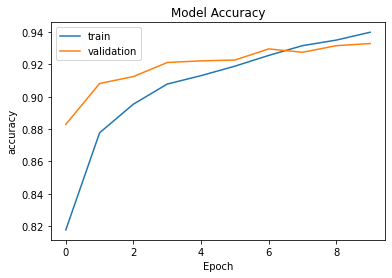

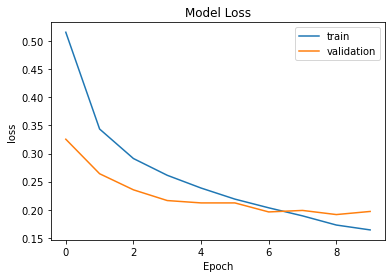

In [23]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

On visualizaing the accuracy and loss digram of both train and validation data, it is visible that the best accuracy for training and validation data is on **Final epoch**.

## Model Performance

In [24]:
y_p=model.predict(X_test)

In [25]:
y_p

array([[9.9986458e-01, 1.0530972e-10, 1.4662097e-06, ..., 4.0460010e-13,
        5.9667169e-09, 4.2432065e-13],
       [1.2005753e-10, 1.0000000e+00, 3.8740968e-12, ..., 3.4288451e-15,
        1.0681235e-10, 6.5570605e-12],
       [4.9907165e-03, 1.1026406e-07, 8.0589843e-01, ..., 4.3736726e-11,
        1.3292066e-07, 1.3257264e-09],
       ...,
       [2.9086137e-15, 5.0476584e-20, 4.6870105e-17, ..., 1.0021752e-18,
        1.0000000e+00, 1.0184748e-16],
       [1.3235128e-06, 4.5522643e-08, 6.4628997e-10, ..., 2.3177731e-11,
        9.9999809e-01, 1.2347047e-09],
       [1.3606857e-05, 9.8803699e-01, 9.7304246e-07, ..., 2.7897040e-09,
        1.3218891e-05, 6.8281406e-07]], dtype=float32)

Since the prediction of each image is sequence of values, argmax is used for getting the actual predicted labels.

In [26]:
y_pred=[]
for i in range(len(y_p)):
  y_pred.append(np.argmax(y_p[i]))

In [39]:
# Viewing predicted labels
y_pred[:10]

[0, 1, 2, 6, 3, 6, 8, 6, 5, 0]

Predicted Label :  T-shirt/top
Original image :


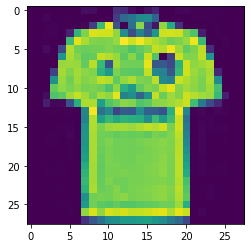

Predicted Label :  Trouser
Original image :


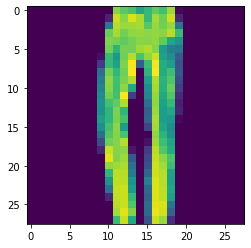

Predicted Label :  Pullover
Original image :


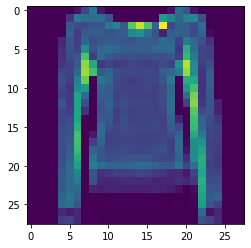

Predicted Label :  Shirt
Original image :


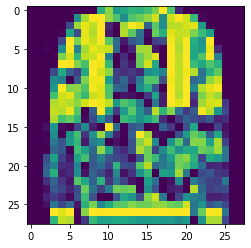

Predicted Label :  Dress
Original image :


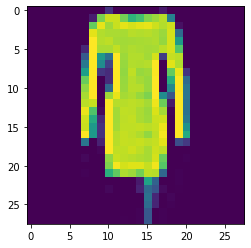

Predicted Label :  Shirt
Original image :


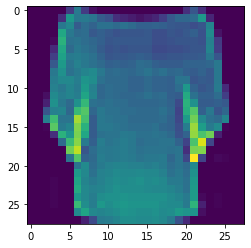

Predicted Label :  Bag
Original image :


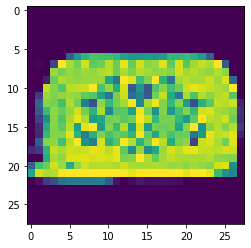

Predicted Label :  Shirt
Original image :


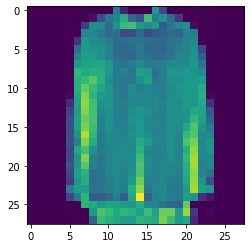

Predicted Label :  Sandal
Original image :


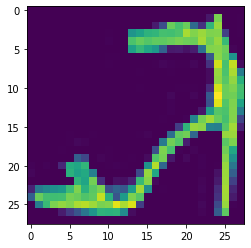

Predicted Label :  T-shirt/top
Original image :


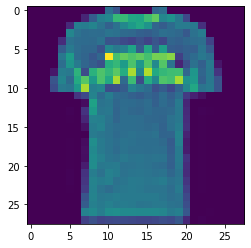

In [40]:
for i in range(10):
  print('Predicted Label : ',labels[y_pred[i]])
  print('Original image :')
  plt.imshow(X_test[i].reshape(28,28))
  plt.show()

## Metrics

In [37]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[876,   0,  13,  12,   0,   0,  89,   0,  10,   0],
       [  0, 991,   0,   5,   2,   0,   1,   0,   1,   0],
       [ 17,   0, 860,  14,  56,   0,  52,   0,   1,   0],
       [  7,   4,   2, 955,  18,   0,  14,   0,   0,   0],
       [  0,   1,  20,  24, 910,   0,  45,   0,   0,   0],
       [  0,   0,   0,   0,   0, 978,   0,  15,   1,   6],
       [ 78,   1,  32,  21,  47,   0, 819,   0,   2,   0],
       [  0,   0,   0,   0,   0,   2,   0, 982,   0,  16],
       [  1,   2,   1,   0,   1,   1,   5,   1, 988,   0],
       [  0,   0,   0,   0,   0,   1,   0,  29,   0, 970]], dtype=int64)

(<Figure size 648x648 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2078ad728b0>)

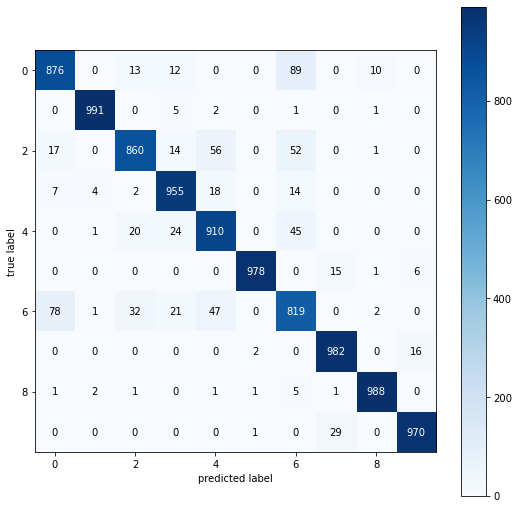

In [36]:
plot_confusion_matrix(conf_mat, figsize=(9,9), colorbar=True)

The confusion matrixes shows that the model is well tuned for image classification of the fashion types.

# THE END